In [1]:
from IPython.display import display, Math, Latex
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image



(560, 420)


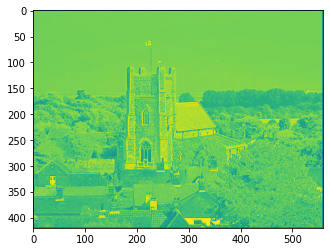

In [2]:
im = Image.open("scene.jpg").convert('L')

print(im.size)
plt.imshow(im)
im.save('greyscale.png')




In [3]:
grey_image = Image.open('greyscale.png')

grey_image = np.asarray(grey_image)



flat = grey_image.flatten()



In [4]:
def calc_hist(image,bins):
    histogram = np.zeros(bins)
    for pixel in image :
        histogram[pixel] += 1
    return histogram
hist = calc_hist(flat,256)


In [5]:
def calc_cumulative(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

cdf = calc_cumulative(hist)


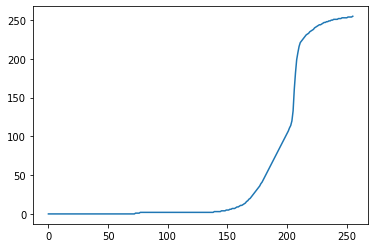

In [6]:
nj = (cdf - cdf.min()) * 255
N = cdf.max() - cdf.min()

# re-normalize the cumsum
cdf = nj / N

# cast it back to uint8 since we can't use floating point values in images
cdf = cdf.astype('uint8')

plt.plot(cdf)

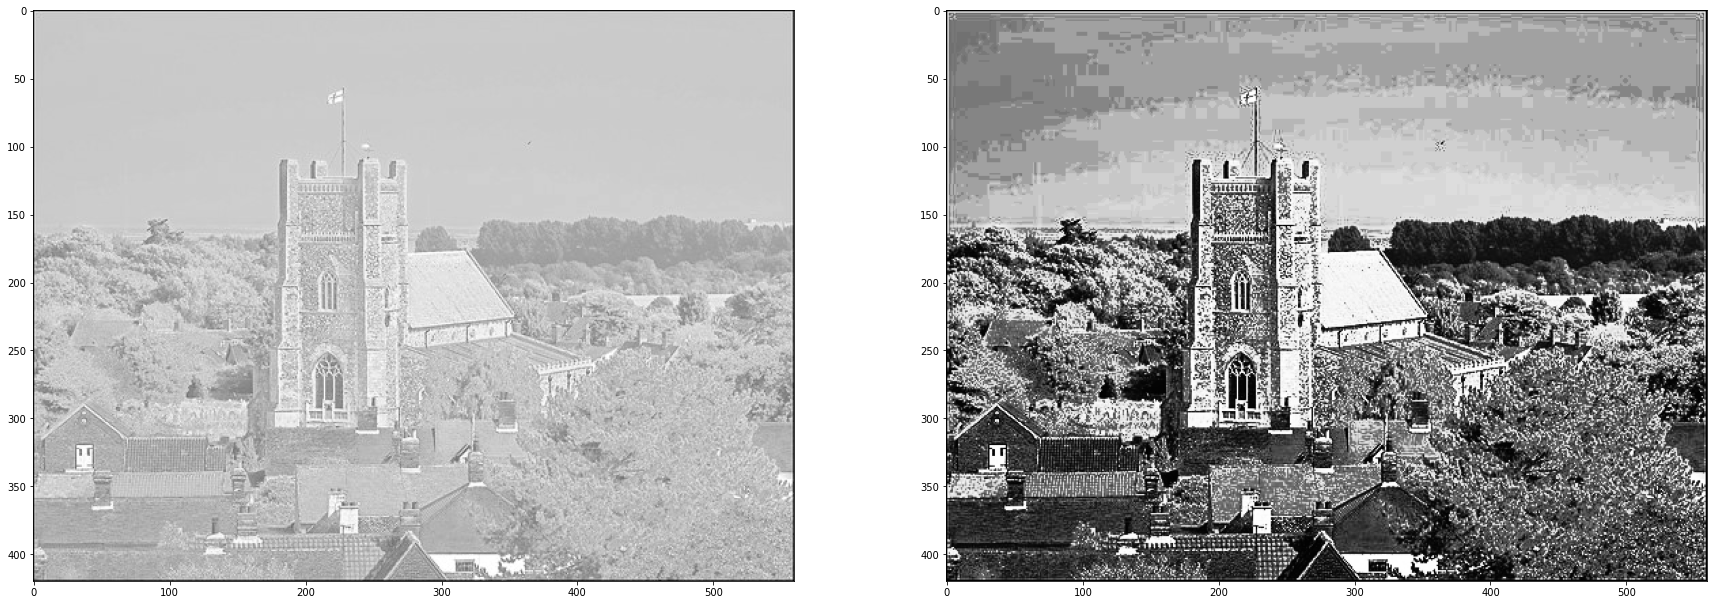

In [7]:
img_new = cdf[flat]
w,h = im.size
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, (h,w))

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)

fig.add_subplot(1,2,1)
plt.imshow(im, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)